**Basic Stock Market Data Exploration and Forecasting with LSTM**

This notebook provides an introductory exploration of stock market data prediction, including basic data preprocessing and a time-series forecasting approach using a Long Short-Term Memory (LSTM) neural network.

The notebook covers the following key steps:

**Data Loading & Preprocessing:** It loads stock market data from a CSV file (google.csv), processes the date field, and prepares the dataset for analysis.

**Data Analysis:** Basic exploration of stock price trends (Open, High, Low, Close, Volume) is conducted, visualizing the stock performance over time.

**Normalization:** The data is scaled using MinMaxScaler from scikit-learn to prepare it for training machine learning models.

**LSTM Model Construction:** A neural network model using LSTM layers from the tensorflow.keras library is constructed to predict future stock prices based on historical data.

This notebook provides an excellent starting point for beginners in data science, particularly those interested in time series forecasting with machine learning.

In [31]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM  # It is possible to use GRU instead of LSTM


In [32]:
df=pd.read_csv('google.csv')
df

,Date,Open,High,Low,Close,Volume
0,30-Jun-17,943.99,945.00,929.61,929.68,2287662
1,29-Jun-17,951.35,951.66,929.60,937.82,3206674
2,28-Jun-17,950.66,963.24,936.16,961.01,2745568
3,27-Jun-17,961.60,967.22,947.09,948.09,2443602
4,26-Jun-17,990.00,993.99,970.33,972.09,1517912
...,...,...,...,...,...,...
3140,7-Jan-05,95.42,97.22,94.48,97.02,9666175
3141,6-Jan-05,97.72,98.05,93.95,94.37,10389803
3142,5-Jan-05,96.82,98.55,96.21,96.85,8239545
3143,4-Jan-05,100.77,101.57,96.84,97.35,13762396


We first convert the Date column from string format to a datetime object to ensure the dates are properly formatted for time-series analysis.

In [33]:
df['Date']=pd.to_datetime(df['Date'])

<AxesSubplot: xlabel='Date'>

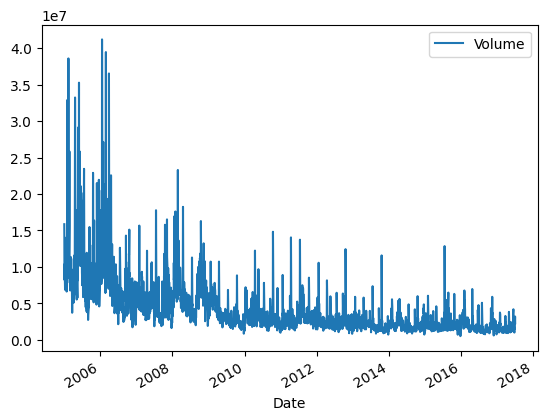

In [34]:
df.plot(x='Date',y='Volume')

**Data Normalization with MinMaxScaler**
This cell normalizes the stock data (Open, High, Low, Close, and Volume) to a scale between 0 and 1. Normalization is critical for training neural networks, ensuring that all features are on a comparable scale.

In [35]:

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['Volume']])

The create_sequences function generates input-output pairs from time series data. It slices the data into sequences of a specified length (time_steps) to use as input (X), and the value immediately following each sequence as the target (y). This is commonly used to prepare data for time series forecasting or machine learning models.

In [36]:
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10  # You can adjust this
X, y = create_sequences(df_scaled, time_steps)


In [37]:
X.shape, y.shape

((3135, 10, 1), (3135, 1))

To evaluate the model, lets take 20% of the latest data as the training set.

In [38]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


**LSTM Model Definition**

 Defines a Sequential model with two LSTM layers for time-series forecasting. The first LSTM layer has return_sequences=True, indicating that it returns the entire sequence to the next LSTM layer. Dense layers are added to refine the output, ultimately producing a single prediction.

In [39]:
model = Sequential()

# Add LSTM layer with 50 units and input shape based on your data
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Add another LSTM layer
model.add(LSTM(units=50))

# Add the output layer (Dense layer with one neuron for predicting the next value)
model.add(Dense(units=1))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Model Compilation and Training**
Compiles the LSTM model with the adam optimizer and mean_squared_error loss function. It is trained on the scaled training data (X_train, y_train) for 20 epochs with a batch size of 32.

In [40]:
# Compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [42]:
X_train.shape

(2508, 10, 1)

In [43]:
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0022
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010    
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6505e-04
Epoch 15/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.9526e-04
Epoch 1

In [44]:
predicted_stock_price = model.predict(X_test)

# Since the data was scaled, you need to inverse transform it back to the original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


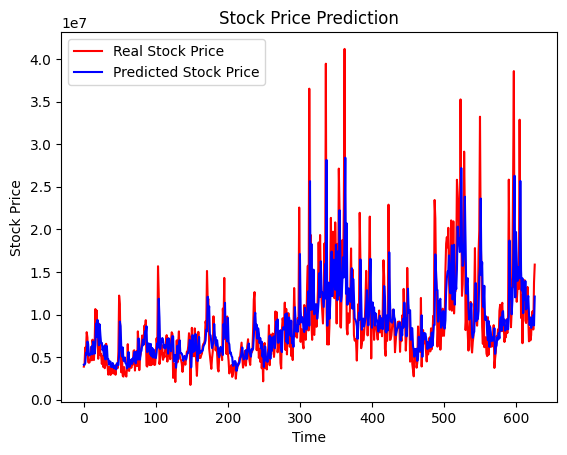

In [45]:
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Optionally, plot the results to visualize predictions
import matplotlib.pyplot as plt

plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Lets evaluate the prediction.

In [46]:
predicted_stock_price

array([[ 4104720. ],
       [ 4128283.5],
       [ 4288058. ],
       [ 5491166. ],
       [ 5304269.5],
       [ 6827789.5],
       [ 6558945.5],
       [ 5178920. ],
       [ 5267318.5],
       [ 5272316. ],
       [ 5515320. ],
       [ 6267466.5],
       [ 5332669. ],
       [ 6821449.5],
       [ 6359996. ],
       [ 5412066.5],
       [ 6439515. ],
       [ 8930642. ],
       [ 7361997.5],
       [ 9367530. ],
       [ 7384554.5],
       [ 6389844. ],
       [ 8836553. ],
       [ 7597227. ],
       [ 6592771.5],
       [ 6668833. ],
       [ 5808375. ],
       [ 6129765. ],
       [ 5160065.5],
       [ 6384678.5],
       [ 4730987. ],
       [ 5388889.5],
       [ 6296237.5],
       [ 4792243.5],
       [ 4761494.5],
       [ 4099409.8],
       [ 4485150.5],
       [ 4473991.5],
       [ 3856443.8],
       [ 3832672.5],
       [ 4307315.5],
       [ 4031993. ],
       [ 3677663.2],
       [ 4000925.5],
       [ 3963794. ],
       [ 3568355.5],
       [ 4281981. ],
       [ 4154

In [48]:
train_size = int(len(X) * 0.8)

y_train_pred, y_test_pred = predicted_stock_price[:train_size], y[train_size:]
y_train_real, y_test_real = real_stock_price[:train_size], y[train_size:]

In [50]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
r2_score(y_true = y_test_real, y_pred= y_test_pred)
mean_absolute_percentage_error(y_true = y_test_real, y_pred= y_test_pred)

0.0

**To Do :**
-Consider some metric for evaluation(MAPE, RMSE, R2)
-Hyperparameter Tuning
-Drop out
